In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [144]:
#Importing the dataset
df= pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [145]:
df.shape

(1470, 35)

We have 1470 rows and 35 columns in the given data set.

In [146]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Here attrition is our target variable and the others are features.
Department, Education Field, Business Travel,Gender are all categorical variables

In [147]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in the dataset

In [148]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

We can see that the Employee Number is unique for each row, so we can delete it.

In [149]:
df = df.drop("EmployeeNumber",axis =1)

In [150]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [151]:
df['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [152]:

df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<AxesSubplot:title={'center':'Attrition count'}, xlabel='Attrition', ylabel='count'>

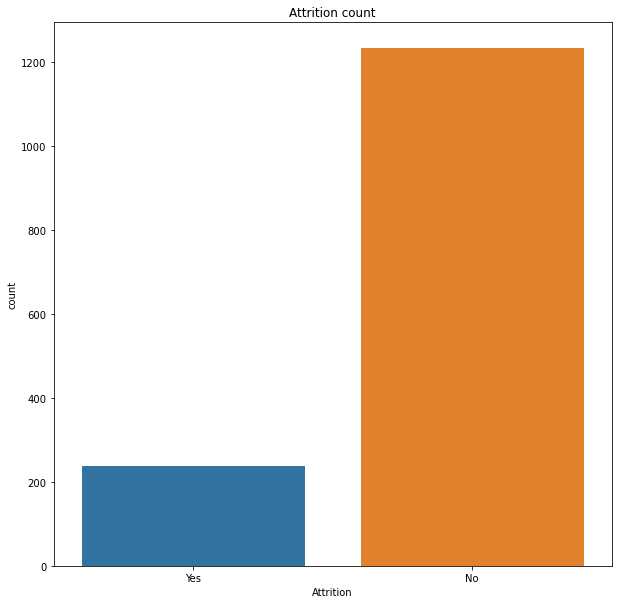

In [153]:
plt.figure(figsize=(10,10))
plt.title('Attrition count')
sn.countplot(df['Attrition'])

We can see that the class is imbalanced.
We will have to handle it later.

<AxesSubplot:xlabel='Department', ylabel='count'>

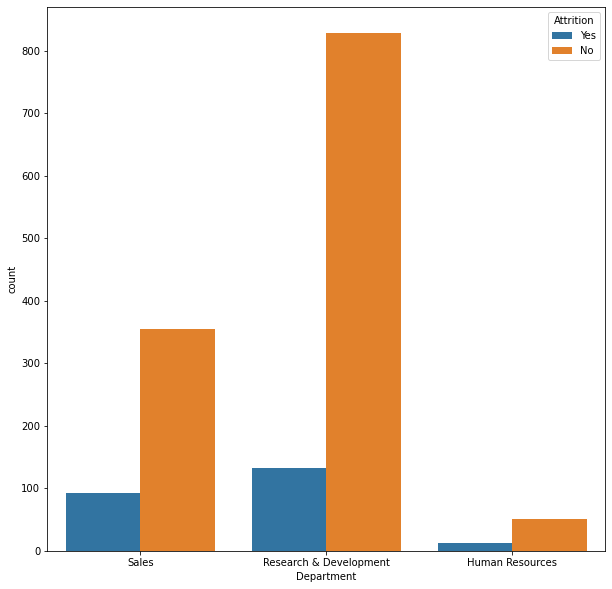

In [154]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='Department', hue='Attrition')

Employees in HR show least attrition and Employees in RnD show maximum attrition.

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

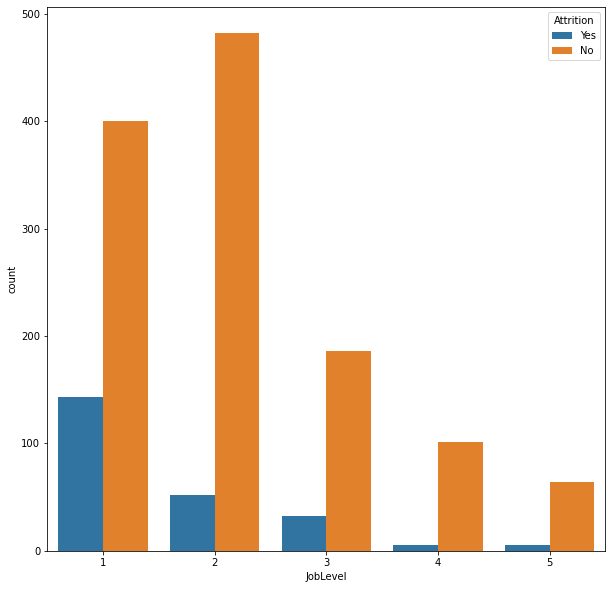

In [155]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='JobLevel', hue='Attrition')

Employees at job level 4 and 5 show least attrition.

<AxesSubplot:xlabel='EducationField', ylabel='count'>

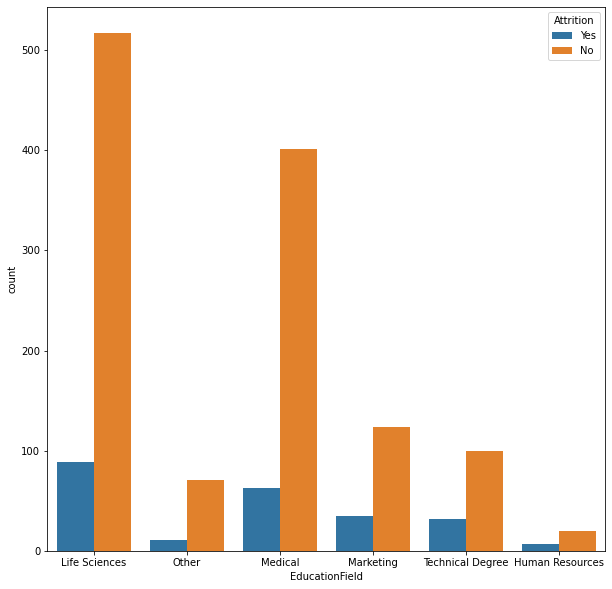

In [156]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='EducationField', hue='Attrition')

There are more Employees from Life Sciences background.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

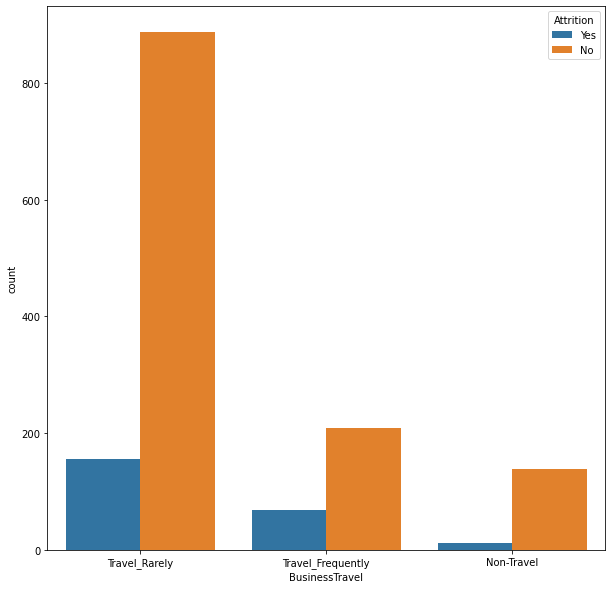

In [157]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='BusinessTravel', hue='Attrition')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

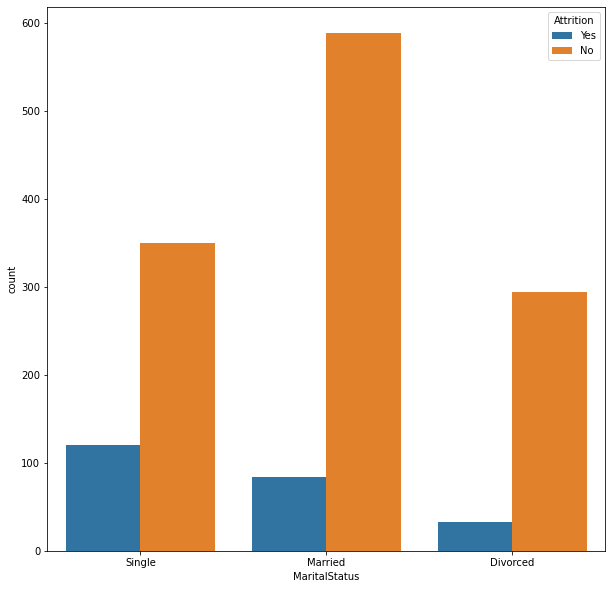

In [158]:
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='MaritalStatus', hue='Attrition')

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

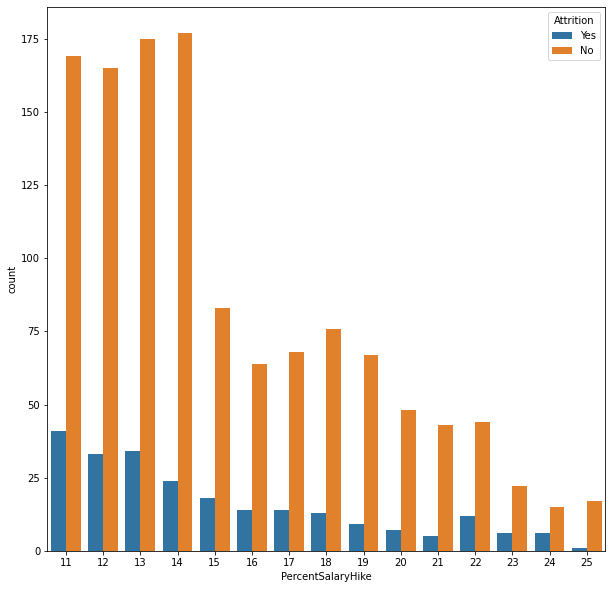

In [159]:
  
plt.figure(figsize=(10,10))
sn.countplot(data=df, x='PercentSalaryHike', hue='Attrition')

Employees with Salary hike of more than 22% are more likely to stay.

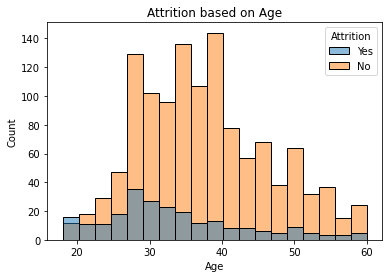

In [160]:
sn.histplot(x="Age", hue="Attrition", data=df)
plt.title("Attrition based on Age")
plt.show()

Employees of Age 40 and abive show less Attrition

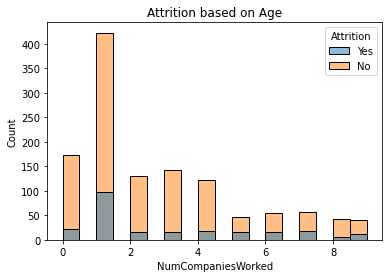

In [161]:
sn.histplot(x="NumCompaniesWorked", hue="Attrition", data=df)
plt.title("Attrition based on Age")
plt.show()

Employees who have worked in less than 2 companies are more likely to leave.

In [162]:
cor=df.corr()
cor

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,NaN,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,-0.012454,NaN,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


<AxesSubplot:>

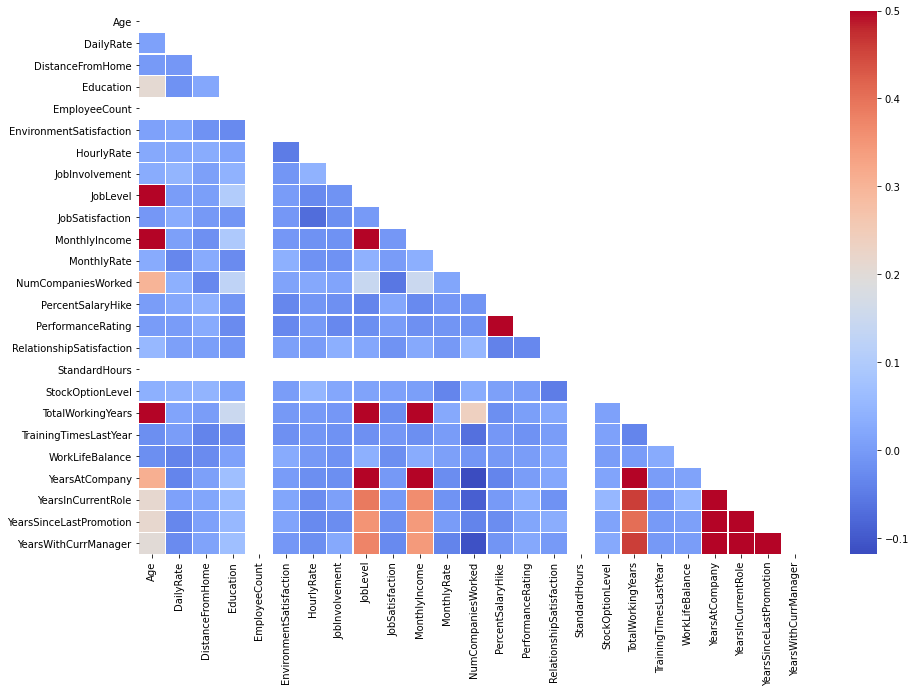

In [163]:

corr = df.corr()
hide = np.zeros_like(corr)
hide[np.triu_indices_from(hide)] = True
plt.figure(figsize=(15, 10))
sn.heatmap(corr,
            vmax=.5,
            mask=hide,
            linewidths=.2, cmap="coolwarm")

In [164]:
#Deleting the columns
df =df.drop(['EmployeeCount','StandardHours'],axis = 1)
df.shape

(1470, 32)

In [165]:
df =df.drop("Over18",axis = 1)

<AxesSubplot:>

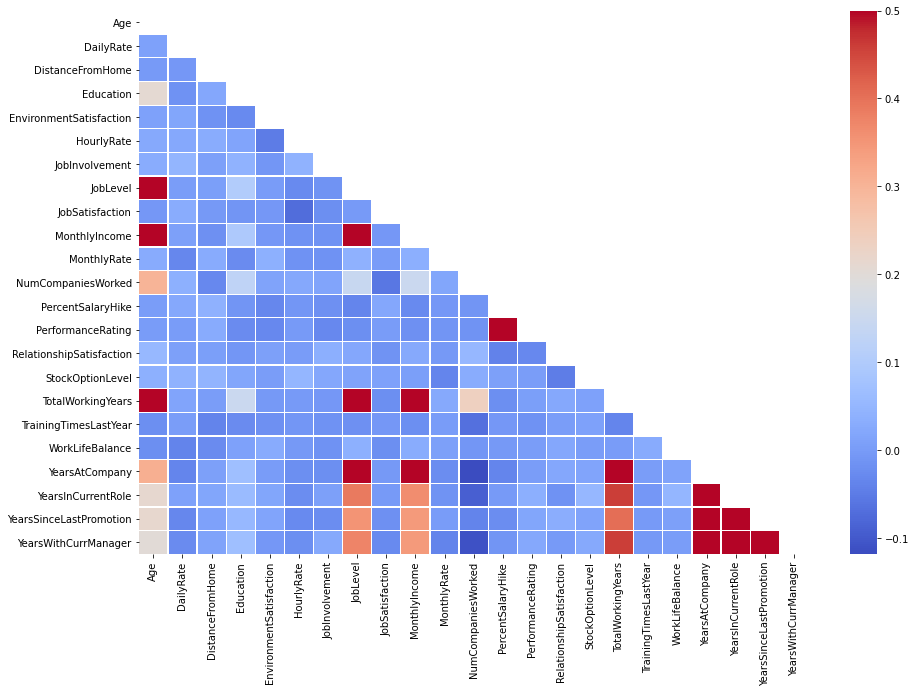

In [166]:
corr = df.corr()
hide = np.zeros_like(corr)
hide[np.triu_indices_from(hide)] = True
plt.figure(figsize=(15, 10))
sn.heatmap(corr,
            vmax=.5,
            mask=hide,
            linewidths=.2, cmap="coolwarm")

We see that the Attrition is positively related to Over time and Marital Status.
and is negatively correlated to Job level, Monthly income and Total working years

In [167]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [168]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
columns = ['Attrition','BusinessTravel','Department','Gender','Marital Status','Overtime']
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

We have encoded the features using Label Encoder which has less than 3 unique values.

In [169]:
#Let us fill the remaining categorical variables with dummy values.
df = pd.get_dummies(df, drop_first=True)

In [170]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

We can see that now all the categorical variables are converted into 

In [171]:
no_attr = df[df.Attrition==0]
yes_attr = df[df.Attrition==1]

In [172]:
from sklearn.utils import resample
#upsampling minority
attr_upsampled = resample(yes_attr,
                         replace = True,
                         n_samples = len(no_attr),
                         random_state =27)

In [173]:
upsampled = pd.concat([no_attr,attr_upsampled])

In [174]:
y = upsampled['Attrition']
x = upsampled.drop(['Attrition'],axis = 1)

In [175]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.73809524, 0.5       , 0.12768362, ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.35714286, 0.5       , 0.92655367, ..., 0.38888889, 0.2       ,
        0.        ],
       [0.21428571, 1.        , 0.35254237, ..., 0.11111111, 0.13333333,
        0.11764706],
       ...,
       [0.0952381 , 0.5       , 0.9039548 , ..., 0.11111111, 0.06666667,
        0.11764706],
       [0.66666667, 1.        , 0.41468927, ..., 0.44444444, 0.26666667,
        0.41176471],
       [0.61904762, 1.        , 0.70169492, ..., 0.22222222, 0.        ,
        0.11764706]])

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [177]:
from sklearn.tree import DecisionTreeClassifier

maxaccu =0
maxrs = 0
for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    acc = accuracy_score(ytest,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print("Best accuracy is ",maxaccu,"on random state ",maxrs)

Best accuracy is  0.946515397082658 on random state  167


<b> Model Building <b>

In [178]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.25, random_state=maxrs)

In [179]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [180]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       293
           1       0.93      0.99      0.96       324

    accuracy                           0.95       617
   macro avg       0.96      0.95      0.95       617
weighted avg       0.96      0.95      0.95       617



In [181]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[267,  26],
       [  2, 322]], dtype=int64)

In [182]:
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       293
           1       0.88      0.88      0.88       324

    accuracy                           0.87       617
   macro avg       0.87      0.87      0.87       617
weighted avg       0.87      0.87      0.87       617



In [183]:
confusion_matrix(y_test,y_pred)

array([[253,  40],
       [ 40, 284]], dtype=int64)

In [184]:
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.91      0.81      0.85       293
           1       0.84      0.93      0.88       324

    accuracy                           0.87       617
   macro avg       0.87      0.87      0.87       617
weighted avg       0.87      0.87      0.87       617



In [185]:
confusion_matrix(y_test,y_pred)

array([[236,  57],
       [ 24, 300]], dtype=int64)

In [186]:
lr= LogisticRegression(random_state=1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       293
           1       0.82      0.81      0.81       324

    accuracy                           0.80       617
   macro avg       0.80      0.80      0.80       617
weighted avg       0.80      0.80      0.80       617



In [187]:
confusion_matrix(y_test,y_pred)

array([[234,  59],
       [ 63, 261]], dtype=int64)

In [188]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       293
           1       0.82      0.85      0.83       324

    accuracy                           0.82       617
   macro avg       0.82      0.82      0.82       617
weighted avg       0.82      0.82      0.82       617



In [189]:
confusion_matrix(y_test,y_pred)

array([[231,  62],
       [ 50, 274]], dtype=int64)

In [190]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       293
           1       0.97      0.99      0.98       324

    accuracy                           0.98       617
   macro avg       0.98      0.98      0.98       617
weighted avg       0.98      0.98      0.98       617



In [191]:
confusion_matrix(y_test,y_pred)

array([[283,  10],
       [  3, 321]], dtype=int64)

In [192]:
from sklearn.model_selection import cross_val_score

In [193]:
print(cross_val_score(dtc,x_scaled,y,cv=5).mean())

0.9286291481551437


In [194]:
print(cross_val_score(rfc,x_scaled,y,cv=5).mean())

0.9801274523490815


In [195]:
print(cross_val_score(lr,x_scaled,y,cv=5).mean())

0.7749340976094472


In [196]:
print(cross_val_score(abc,x_scaled,y,cv=5).mean())

0.8037258460553005


In [197]:
print(cross_val_score(knc,x_scaled,y,cv=5).mean())

0.8840216471902178


In [198]:
print(cross_val_score(sv,x_scaled,y,cv=5).mean())

0.8791493869640554


In [199]:
from sklearn import metrics

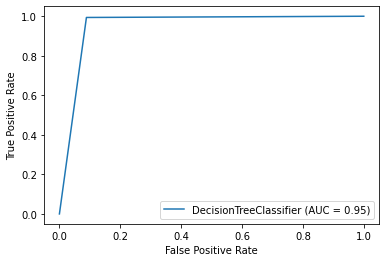

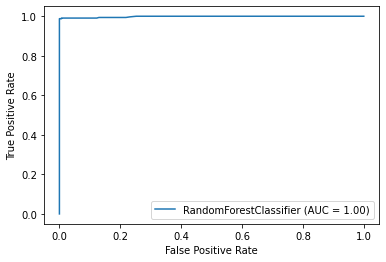

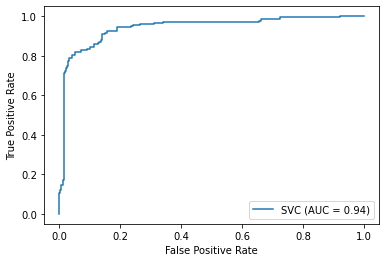

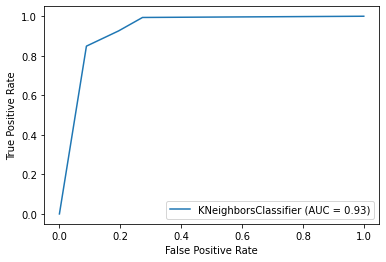

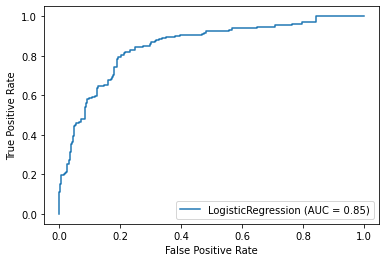

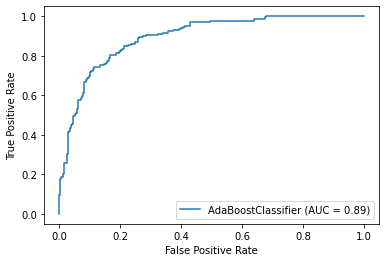

In [200]:
models =[dtc,rfc,sv,knc,lr,abc]
for i in models:
    metrics.plot_roc_curve(i, X_test, y_test)  
    plt.show()

We see that Random Forest Classifier is the best model according to the metrics.


<b>Hyperparamter Tuning<b>

In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
parameter = { 
            'max_depth' : np.arange(2,40),
              'criterion':['gini', 'entropy'],
             'max_features':['auto', 'sqrt', 'log2'],
             }

In [203]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=3)

In [204]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [205]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 21, 'max_features': 'log2'}

In [206]:
Final_mod = RandomForestClassifier(criterion='gini',max_depth=20,max_features='sqrt')
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

98.37925445705025


In [207]:
confusion_matrix(y_test,pred)

array([[286,   7],
       [  3, 321]], dtype=int64)

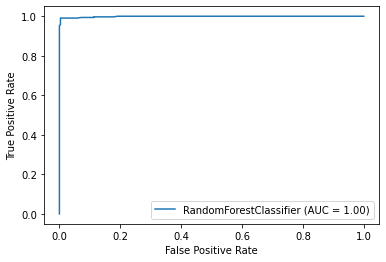

In [208]:
metrics.plot_roc_curve(Final_mod, X_test, y_test)  
plt.show()

<b>Saving the model<b>

In [209]:
import joblib
joblib.dump(Final_mod,"HRAnalytics.pkl")

['HRAnalytics.pkl']